#In this Project I used Chatgpt to act like my boss and give me some tasks to solve at this data set

# Sales Analysis With Python

## BUSINESS REQUIREMENT
To conduct a comprehensive analysis of Blinkit's sales performance, customer satisfaction, and inventory distribution to identify key insights and opportunities for optimization using various KPIs and visualizations in Power BI.
### KPI's Requirements(Insights, Aggregations, and Analysis)

**Basic KPI Tasks**
1. Remove duplicates from the dataset.

2. Handle missing values in the Item Weight column (e.g., fill with mean per Item Type).

3. Clean inconsistent values in Item Fat Content (e.g., "Low Fat", "low fat", "LF").

4. Count how many unique Item Types exist and list the top 5 most frequent.

5. Count the number of unique outlets and calculate how many years each has operated (use current year = 2025).

**Intermediate KPI Tasks**
6. Calculate average sales by Item Type, sorted descending.

7. Create a pivot table for average Sales across Outlet Type vs Outlet Size.

8. Determine the Outlet with the highest average rating and compare its sales to others.

9. Create a new column: Item Age = 2025 - Outlet Establishment Year. Analyze how average sales change with item age.

**Advanced KPI Tasks**
10. Use NumPy to classify each row into a new column Sales Category:

'Low' if sales < 100

'Medium' if 100 ≤ sales < 200

'High' if sales ≥ 200
Then count the total number in each category.

11. Identify items with unusually high visibility but low sales and print their key details.

12. Create a correlation matrix for numeric columns and interpret the strongest relationships.

### Chart's Requirements

14. Bar Chart: Average sales by Outlet Type.

15. Line Chart: Item Visibility vs. Sales (use a 500-row sample for clarity).

16. Pie Chart: Distribution of Sales Category (task 10).

17. Heatmap: Correlation matrix between all numerical features.


---------------------------------------------------------------------------------------------------------------------------------------

### **Import Libraries**

In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### **Import the data**

In [63]:
df = pd.read_csv(r'F:\Porfolio Project\Python\Blinkit analysis Project\blinkit_data.csv')

### **EDA**

In [64]:
df.head(25)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [65]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

## **BUSINESS REQUIREMENTS**

## **KPI's Requirements**

1. Remove duplicates from the dataset.

In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df[df.duplicated()]

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating


2. Handle missing values in the Item Weight column (e.g., fill with mean per Item Type).

In [79]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.100000,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.800000,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.850000,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.150000,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.600000,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,13.142314,164.5526,4.0
8519,Low Fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,12.987880,241.6828,4.0
8520,Low Fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,11.847460,86.6198,4.0
8521,Regular,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,13.426069,97.8752,4.0


In [69]:
df['Item Weight'].isnull().sum()

np.int64(1463)

In [70]:
df['Item Weight'] = df.groupby('Item Type')['Item Weight'].transform(
    lambda x: x.fillna(x.mean())
)

In [71]:
df['Item Weight'].isnull().sum()

np.int64(0)

3. Clean inconsistent values in Item Fat Content (e.g., "Low Fat", "low fat", "LF").

In [73]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [77]:
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})


In [78]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

4. Count how many unique Item Types exist and list the top 5 most frequent.

In [140]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Years Operating,Item_Age,Sales Category
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.100000,145.4786,5.0,13,13,Medium
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.800000,115.3492,5.0,3,3,Medium
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.850000,165.0210,5.0,15,15,Medium
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.150000,126.5046,5.0,25,25,Medium
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.600000,55.1614,5.0,10,10,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,13.142314,164.5526,4.0,27,27,Medium
8519,Low Fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,12.987880,241.6828,4.0,27,27,High
8520,Low Fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,11.847460,86.6198,4.0,27,27,Low
8521,Regular,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,13.426069,97.8752,4.0,27,27,Low


In [80]:
df['Item Type'].nunique()

16

In [81]:
df['Item Type'].unique

<bound method Series.unique of 0       Fruits and Vegetables
1          Health and Hygiene
2                Frozen Foods
3                      Canned
4                 Soft Drinks
                ...          
8518       Health and Hygiene
8519              Snack Foods
8520              Soft Drinks
8521                    Dairy
8522              Snack Foods
Name: Item Type, Length: 8523, dtype: object>

In [82]:
df['Item Type'].value_counts().head(5)

Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Name: count, dtype: int64

5. Count the number of unique outlets and calculate how many years each has operated (use current year = 2025).

In [83]:
df['Outlet Identifier'].nunique()

10

In [84]:
df['Years Operating'] = 2025 - df['Outlet Establishment Year']

In [139]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Years Operating,Item_Age,Sales Category
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.100000,145.4786,5.0,13,13,Medium
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.800000,115.3492,5.0,3,3,Medium
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.850000,165.0210,5.0,15,15,Medium
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.150000,126.5046,5.0,25,25,Medium
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.600000,55.1614,5.0,10,10,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,13.142314,164.5526,4.0,27,27,Medium
8519,Low Fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,12.987880,241.6828,4.0,27,27,High
8520,Low Fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,11.847460,86.6198,4.0,27,27,Low
8521,Regular,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,13.426069,97.8752,4.0,27,27,Low


6. Calculate average sales by Item Type, sorted descending.

In [90]:
avg_sales = df.groupby('Item Type')['Sales'].mean()

In [101]:
avg_sales_sorted = avg_sales.sort_values(ascending=False)

In [102]:
avg_sales_sorted = avg_sales_sorted.reset_index()
avg_sales_sorted.columns = ['Item_Type', 'Average_Sales']


7. Create a pivot table for average Sales across Outlet Type vs Outlet Size.

In [103]:
pivot_table = pd.pivot_table(
    df,
    values = 'Sales',
    index = 'Outlet Type',
    columns = 'Outlet Size',
    aggfunc = 'mean'
)

In [106]:
pivot_table

Outlet Size,High,Medium,Small
Outlet Type,,,
Grocery Store,139.785936,140.294752,140.497290
Supermarket Type1,142.382540,138.739303,141.974649
Supermarket Type2,0.000000,141.678634,0.000000
Supermarket Type3,0.000000,139.801791,0.000000


In [113]:
pivot_table.fillna(0, inplace = True)

8. Determine the Outlet with the highest average rating and compare its sales to others.

In [138]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Years Operating,Item_Age,Sales Category
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.100000,145.4786,5.0,13,13,Medium
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.800000,115.3492,5.0,3,3,Medium
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.850000,165.0210,5.0,15,15,Medium
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.150000,126.5046,5.0,25,25,Medium
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.600000,55.1614,5.0,10,10,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,13.142314,164.5526,4.0,27,27,Medium
8519,Low Fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,12.987880,241.6828,4.0,27,27,High
8520,Low Fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,11.847460,86.6198,4.0,27,27,Low
8521,Regular,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,13.426069,97.8752,4.0,27,27,Low


In [ ]:
# Step1: Get average rating per outlet (Series)
avg_ratings = df.groupby('Outlet Identifier')['Rating'].mean()

# Step2: Get the outlet with the highest rating
top_rated_outlet = avg_ratings.idxmax()     # returns the Outlet_Identifier 
top_rating_value = avg_ratings.max()        # returns the highest rating


In [119]:
print("Top rated outlet:", top_rated_outlet)
print("Average rating:", top_rating_value)

Top rated outlet: OUT019
Average rating: 3.9950757575757576


9. Create a new column: Item Age = 2025 - Outlet Establishment Year. Analyze how average sales change with item age.

In [121]:
df['Item_Age'] = 2025 - df['Outlet Establishment Year']

In [124]:
avg_sales_by_age = df.groupby('Item_Age')['Sales'].mean().sort_index()

In [125]:
avg_sales_by_age = avg_sales_by_age.reset_index()
avg_sales_by_age.columns = ['Item_Age', 'Average_Sales']
print(avg_sales_by_age)

   Item_Age  Average_Sales
0         3     141.678634
1         5     139.421119
2         8     143.122481
3        10     140.950246
4        13     140.297699
5        14     140.777594
6        15     142.057387
7        25     141.425982
8        27     139.796485


10. Use NumPy to classify each row into a new column Sales Category:

'Low' if sales < 100

'Medium' if 100 ≤ sales < 200

'High' if sales ≥ 200
Then count the total number in each category.

In [130]:
#Conditions
conditions = [
    df['Sales'] < 100,
    (df['Sales'] >= 100) & (df['Sales'] < 200),
    df['Sales'] >= 200
  ]

In [131]:
#Corresponding labels
categories = ['Low','Medium','High']

In [135]:
#Classification
df['Sales Category'] = np.select(conditions, categories, default = 'Low')

In [170]:
sales_count =  df['Sales Category'].value_counts()

In [137]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Years Operating,Item_Age,Sales Category
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.100000,145.4786,5.0,13,13,Medium
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.800000,115.3492,5.0,3,3,Medium
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.850000,165.0210,5.0,15,15,Medium
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.150000,126.5046,5.0,25,25,Medium
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.600000,55.1614,5.0,10,10,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,13.142314,164.5526,4.0,27,27,Medium
8519,Low Fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,12.987880,241.6828,4.0,27,27,High
8520,Low Fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,11.847460,86.6198,4.0,27,27,Low
8521,Regular,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,13.426069,97.8752,4.0,27,27,Low


Pie Chart: Distribution of Sales Category.

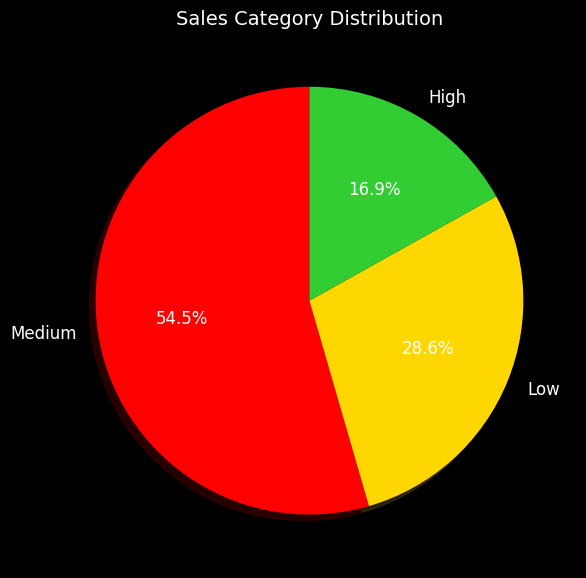

In [ ]:
plt.style.use('dark_background') 

plt.figure(figsize=(6, 6))

colors = ['red', 'gold', 'limegreen']
sales_count.plot.pie(
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    shadow=True,
    textprops={'color': 'white', 'fontsize': 12}
)

plt.title('Sales Category Distribution', color='white', fontsize=14)
plt.ylabel('') 

plt.tight_layout()
plt.show()

11. Identify items with unusually high visibility but low sales and print their key details.

In [141]:
high_visibility_threshold = df['Item Visibility'].quantile(0.90)
low_sales_threshold = df['Sales'].quantile(0.10)

In [143]:
unusual_items = df[
    (df['Item Visibility'] > high_visibility_threshold)
    &
    (df['Sales'] < low_sales_threshold)
]

In [145]:
print(unusual_items[
      [
    'Item Identifier',
    'Item Type',
    'Item Visibility',
    'Sales'
    ]
])

     Item Identifier     Item Type  Item Visibility    Sales
33             NCE31     Household         0.184690  35.4216
227            FDY12  Baking Goods         0.141406  50.0008
230            FDQ47        Breads         0.169138  35.2874
231            FDZ13        Canned         0.154363  50.8350
239            FDU27          Meat         0.172447  47.1376
...              ...           ...              ...      ...
8078           NCE31     Household         0.185597  35.7216
8191           FDV28  Frozen Foods         0.160379  33.6558
8359           NCE31     Household         0.183948  33.6216
8471           FDV28  Frozen Foods         0.158955  34.9558
8493           FDU27          Meat         0.170646  46.3376

[111 rows x 4 columns]


12. Create a correlation matrix for numeric columns and interpret the strongest relationships.

In [146]:
correlation_matrix = df.corr(numeric_only = True)

In [147]:
correlation_matrix

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating,Years Operating,Item_Age
Outlet Establishment Year,1.000000,-0.074834,-0.008376,0.005020,0.004489,-1.000000,-1.000000
Item Visibility,-0.074834,1.000000,-0.011620,-0.001315,0.000798,0.074834,0.074834
Item Weight,-0.008376,-0.011620,1.000000,0.025821,0.003999,0.008376,0.008376
Sales,0.005020,-0.001315,0.025821,1.000000,0.011329,-0.005020,-0.005020
Rating,0.004489,0.000798,0.003999,0.011329,1.000000,-0.004489,-0.004489
Years Operating,-1.000000,0.074834,0.008376,-0.005020,-0.004489,1.000000,1.000000
Item_Age,-1.000000,0.074834,0.008376,-0.005020,-0.004489,1.000000,1.000000


In [148]:
#Flatten
corr_pairs = correlation_matrix.unstack()

#Drop self-correlations
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

#Drop duplicates
corr_pairs = corr_pairs.drop_duplicates().sort_values(ascending = True)

In [151]:
#Top Positive correlations
Positive_corrs = corr_pairs[corr_pairs > 0]
print('Top positive correlations:')
print(Positive_corrs.head(5))

Top positive correlations:
Item Visibility            Rating             0.000798
Item Weight                Rating             0.003999
Outlet Establishment Year  Rating             0.004489
                           Sales              0.005020
Item Weight                Years Operating    0.008376
dtype: float64


In [154]:
#Top Negative Correlations
Negative_corrs = corr_pairs[corr_pairs < 0]
print('Top negative Correlations:')
print(Negative_corrs.head(5))

Top negative Correlations:
Outlet Establishment Year  Years Operating   -1.000000
                           Item Visibility   -0.074834
Item Visibility            Item Weight       -0.011620
Outlet Establishment Year  Item Weight       -0.008376
Sales                      Years Operating   -0.005020
dtype: float64


----------------------------------------------------------------------------------------------------------------------------------------

### Chart's Requirements

14. Bar Chart: Average sales by Outlet Type.

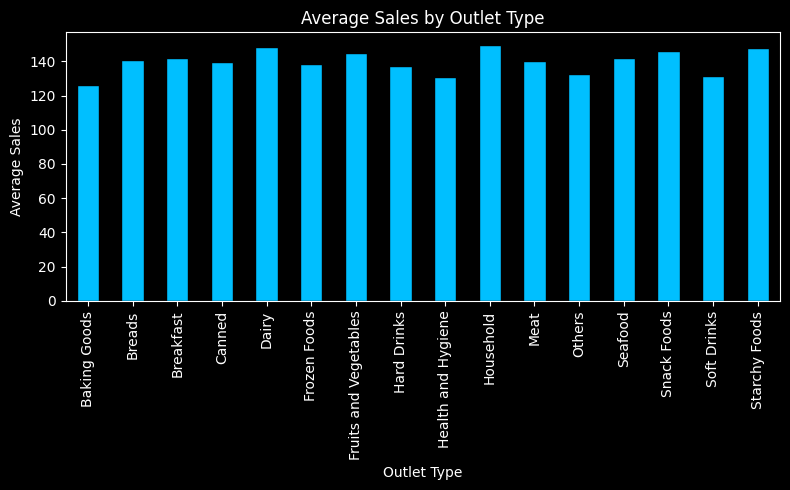

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(8, 5))

avg_sales.plot(kind='bar', color='deepskyblue', edgecolor='black')

plt.title('Average Sales by Outlet Type')

plt.xlabel('Outlet Type')
plt.ylabel('Average Sales')

plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle=' ', alpha=0.7)

plt.show()


15. Line Chart: Item Visibility vs. Sales (use a 500-row sample for clarity).

In [167]:
sample_df = df[['Item Visibility', 'Sales']].sample(500, random_state = 42)
sample_df = sample_df.sort_values('Item Visibility')

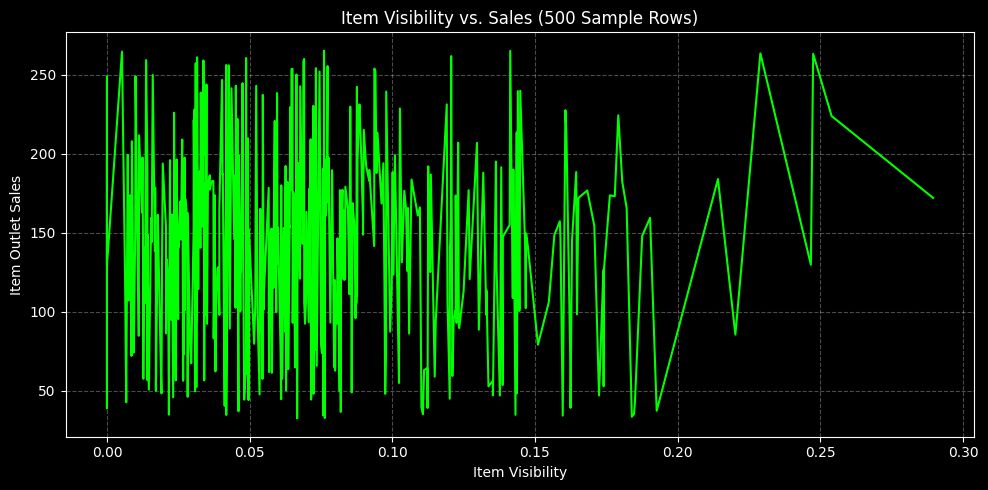

In [168]:
plt.style.use('dark_background')

plt.figure(figsize=(10, 5))
plt.plot(sample_df['Item Visibility'], sample_df['Sales'], color='lime', linewidth=1.5)

plt.title('Item Visibility vs. Sales (500 Sample Rows)', color='white')

plt.xlabel('Item Visibility', color='white')
plt.ylabel('Item Outlet Sales', color='white')

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.xticks(color='white')
plt.yticks(color='white')

plt.show()

17. Heatmap: Correlation matrix between all numerical features.

In [173]:
corr = df.select_dtypes(include=['number']).corr()

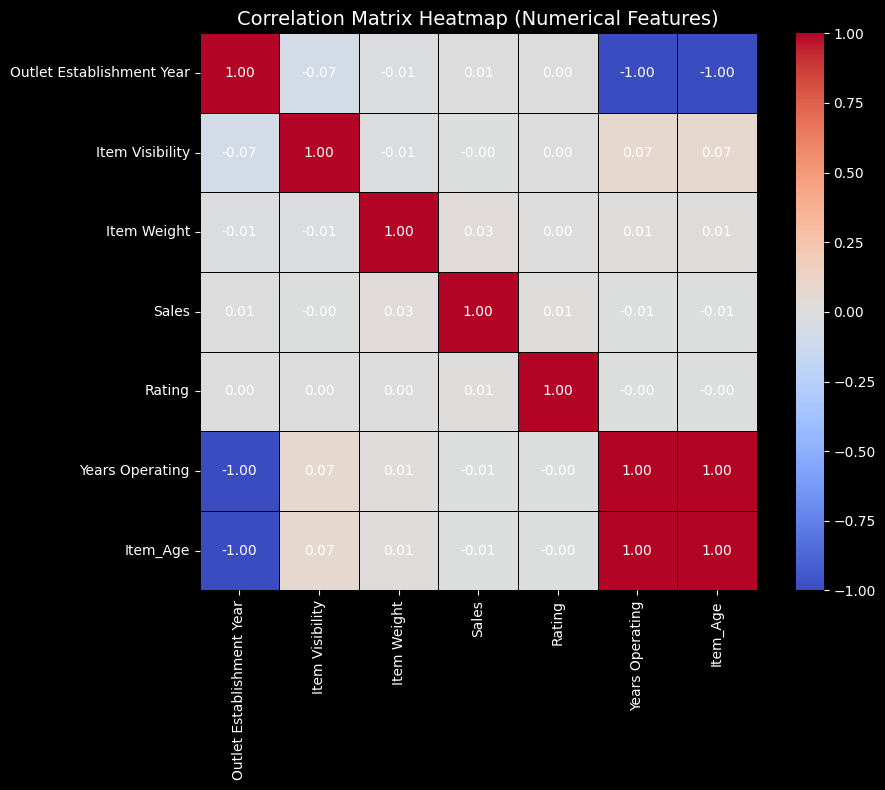

In [175]:
plt.style.use('dark_background') 

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    cbar=True,
    square=True,
    linewidths=0.5,
    linecolor='black',
    annot_kws={"size": 10, "color": "white"}
)

plt.title('Correlation Matrix Heatmap (Numerical Features)', fontsize=14, color='white')

plt.xticks(color='white', rotation=90)
plt.yticks(color='white', rotation=0)

plt.tight_layout()
plt.show()